#Assess and Monitor QCs, Internal Standards, and Common Metabolites

##This notebook will guide people to
* ##Identify their files
* ##Specify the LC/MS method used
* ##Specify the text-string used to differentiate blanks, QCs, and experimental injections
* ##Populate the run log with the pass/fail outcome for each run

##Run each block below.  They will indicate "ok" when completed.  Clear all output prior to starting makes it easier to tell when cells are completed.

In [1]:
import sys
sys.path.insert(0,'/project/projectdirs/metatlas/projects/ms_monitor_tools' )
import warnings
warnings.filterwarnings('ignore')
import ms_monitor_util as mtools
%matplotlib notebook

#The "FutureWarning" above is normal.  Run the next block to select your experiment. 

In [10]:
num_days = raw_input('How many days back to search: ')
experiment = mtools.get_recent_experiments(num_days = int(num_days))

How many days back to search: 10


#After specifying an experiment above, run the next block to get files for that experiment.

In [11]:
mtools = reload(mtools)
files = mtools.get_files_for_experiment(experiment.value)


#Run the next block to specify:
* ##m/z tolerance (ppm)
* ##Retention time tolerance (minutes)

##20 ppm and 0.3 minutes are good for most runs

In [12]:
# mz_tolerance, rt_tolerance = mtools.get_rt_mz_tolerance_from_user()

method = mtools.get_method_dropdown()


#Get Data from Reference

In [13]:
#TODO: have another sheet that creates an Atlas from the google sheet.  Get the values from teh atlas instead.
qc_hilic_vals, common_hilic_vals, istd_hilic_vals = mtools.filter_istd_qc_by_method(method.value,0.3,5)
print "ok"

ok


#Uncomment and run the lines below to print the values in the reference table:

##You can also view the source of these references [here](https://docs.google.com/a/lbl.gov/spreadsheets/d/1SCvTvVloqkrsvT5uoCLP4gGaFO_BolptkiT3uAk_exM/edit?usp=sharing "Title").

In [ ]:
# optional block to view the atlases selected

# istd_hilic_vals
# qc_hilic_vals
# common_hilic_vals

#Specify the blank, qc and pos-neg string used in your file naming

In [14]:
qc_str,blank_str,pos_str,neg_str = mtools.get_blank_qc_pos_neg_string()

#Check that everything is correct by running the next cell

In [7]:
print "Method = ",method.value
print "Experiment = ",experiment.value
print len(files), " files queued for assessment"
print "filter strings are: ", qc_str.value, blank_str.value, pos_str.value, neg_str.value

Method =  6550_HILIC
Experiment =  20160129_SK_Library_QCISMSMLS
102  files queued for assessment
filter strings are:  _QC- _MeOH_ HILICNEG_ HILICPOS_


In [ ]:
# print qc_str.value,blank_str.value
import pandas as pd
sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
#sys.path.append('/project/projectdirs/metatlas/projects/ms_monitor_tools')
import metatlas_get_data_helper_fun as ma_data

from metatlas import metatlas_objects as metob
from metatlas import h5_query as h5q

from datetime import datetime
df = pd.DataFrame()
counter = 0
for my_file in files:
#     finfo = h5q.get_info(my_file.hdf5_file)
#     num_pos_data = finfo['ms1_pos']['nrows'] + finfo['ms2_pos']['nrows']
#     num_neg_data = finfo['ms1_neg']['nrows'] + finfo['ms2_neg']['nrows']
#     do_polarity = []
#     if num_pos_data > 0:
#         do_polarity.append('positive')
#     if num_neg_data > 0:
#         do_polarity.append('negative')
    df.loc[counter, 'name has blank'] = blank_str.value in my_file.name.upper()
    df.loc[counter, 'name has QC'] = qc_str.value in my_file.name.upper()
    df.loc[counter, 'name has pos'] = pos_str.value in my_file.name.upper()
    df.loc[counter, 'name has neg'] = neg_str.value in my_file.name.upper()
    df.loc[counter, 'experiment'] = my_file.experiment
    df.loc[counter, 'filename'] = my_file.name
    df.loc[counter, 'datestamp'] = my_file.creation_time
    df.loc[counter, 'utc time'] = datetime.utcfromtimestamp(my_file.creation_time)
    df.loc[counter, 'lcms method'] = my_file.method #TODO: get instrument and lcms from the method object
    df.loc[counter, 'sample'] = my_file.sample
    df.loc[counter, 'username'] = my_file.username
#     df.loc[counter, 'num positive data'] = num_pos_data
#     df.loc[counter, 'num negative data'] = num_neg_data
    counter = counter + 1
    print counter
#     for compound in atlas.compound_identifications:
#         if compound.mz_references[0].detected_polarity in do_polarity:
#             result = ma_data.get_data_for_a_compound(mz_ref,
#                                     rt_ref,[ 'ms1_summary' ],
#                                     myFile,0.3) #extra_time is not used by ms1_summary
#             df.loc[counter, 'identification name'] = compound.name
#             df.loc[counter, 'compound name'] = compound.compound[0].name #TODO: need to get all possible

            
#             for k in result['ms1_summary'].keys():
#                 if result['ms1_summary'][k]:
#                     df.loc[counter, 'measured %s'%k] = result['ms1_summary'][k]
#                 else:
#                     df.loc[counter, 'measured %s'%k] = ''
#             #{'polarity': [], 'rt_centroid': [], 'mz_peak': [], 'peak_height': [], 'rt_peak': [], 'peak_area': [], 'mz_centroid': []}
#             df.loc[counter, 'expected mz'] = compound.mz_references[0].mz
#             df.loc[counter, 'expected rt'] = compound.rt_references[0].rt_peak
#             df.loc[counter, 'expected polarity'] = compound.mz_references[0].detected_polarity
#             if result['ms1_summary']['rt_peak']:
#                 df.loc[counter, 'delta rt'] = compound.rt_references[0].rt_peak - result['ms1_summary']['rt_peak']
#                 df.loc[counter, 'delta mz'] = (compound.mz_references[0].mz - result['ms1_summary']['mz_centroid']) / compound.mz_references[0].mz * 1e6
#             counter = counter + 1
df

# df.to_excel('bc_istd_neg_assessment_table.xls')

In [ ]:
datetime.datetime.

In [ ]:
import sys
sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
from metatlas import h5_query as h5q

In [ ]:
info = h5q.get_info(files[0])
print info

In [ ]:
d = h5q.get_data(files[0],ms_level=1,polarity = 0)

In [ ]:
d.shape

In [ ]:
myruns = []
for f in files:
    mf = metob.retrieve('LcmsRun',hdf5_file = f,username = '*')[-1]
    myruns.append(mf)

In [ ]:
mtools = reload(mtools)
get_exp = mtools.get_files_from_recent_experiment(4)
display(get_exp)
# import json
# print get_exp.get_selected_rows()
# print json.loads(get_exp.get_state()['_df_json'])[0]

In [ ]:
#identify which files are blank, QC, or sample

In [ ]:
# make the QC figure
# A plot for delta-mz, delta-rt, and delta-intensity for each QC file

In [ ]:
# make the ISTD figure
# A plot for delta-mz, delta-rt, and delta-intensity for each not-blank and not-QC file

In [ ]:
# make the blank figure
# Plot the TIC of each blank and a reference blank
# are all chromatograms less than some intensity
# helper script to let users check specific ions


In [ ]:
#log the results in a csv file

In [ ]:
# make a qgrid widget 

In [ ]:
atlases_to_merge = {'20160108_TS_Negative_Hilic_6550_QCs',
                    '20160119_TS_Positive_Hilic_QE_QCs_v1',
                    '20151130_LS_Positive_Hilic_QExactive_Archetypes_ISTDs',
                    '20151130_LS_Negative_Hilic_QExactive_Archetypes_ISTDs'}

In [ ]:
atlases = metob.retrieve('Atlas',name = '%_istd_%',username='*')
for i,a in enumerate(atlases):
    print i,a.name,a.username,a.creation_time
atlas = atlases[1]

In [ ]:
# atlas = metob.retrieve('Atlas',name = '20160119_TS_Positive_Hilic_QE_QCs_v1',username='*')[-1]

In [ ]:
import pandas as pd
df = pd.DataFrame()
counter = 0
for j in range(len(files)):
    myFile = files[j].hdf5_file
    finfo = h5q.get_info(myFile)
    num_pos_data = finfo['ms1_pos']['nrows'] + finfo['ms2_pos']['nrows']
    num_neg_data = finfo['ms1_neg']['nrows'] + finfo['ms2_neg']['nrows']
    do_polarity = []
    if num_pos_data > 0:
        do_polarity.append('positive')
    if num_neg_data > 0:
        do_polarity.append('negative')
        
    for compound in atlas.compound_identifications:
        if compound.mz_references[0].detected_polarity in do_polarity:
            result = ma_data.get_data_for_a_compound(compound.mz_references[0],
                                    compound.rt_references[0],[ 'ms1_summary' ],
                                    myFile,0.3) #extra_time is not used by ms1_summary

            df.loc[counter, 'is blank'] = '_BLANK' in files[j].name.upper()
            df.loc[counter, 'is QC'] = '_QC_' in files[j].name.upper()
            df.loc[counter, 'experiment'] = files[j].experiment
            df.loc[counter, 'filename'] = files[j].name
            df.loc[counter, 'datestamp'] = files[j].creation_time
            df.loc[counter, 'utc time'] = datetime.utcfromtimestamp(files[j].creation_time)
            df.loc[counter, 'lcms method'] = files[j].method #TODO: get instrument and lcms from the method object
            df.loc[counter, 'sample'] = files[j].sample
            df.loc[counter, 'identification name'] = compound.name
            df.loc[counter, 'compound name'] = compound.compound[0].name #TODO: need to get all possible
            df.loc[counter, 'username'] = files[j].username
            df.loc[counter, 'num positive data'] = num_pos_data
            df.loc[counter, 'num negative data'] = num_neg_data
            for k in result['ms1_summary'].keys():
                if result['ms1_summary'][k]:
                    df.loc[counter, 'measured %s'%k] = result['ms1_summary'][k]
                else:
                    df.loc[counter, 'measured %s'%k] = ''
            #{'polarity': [], 'rt_centroid': [], 'mz_peak': [], 'peak_height': [], 'rt_peak': [], 'peak_area': [], 'mz_centroid': []}
            df.loc[counter, 'expected mz'] = compound.mz_references[0].mz
            df.loc[counter, 'expected rt'] = compound.rt_references[0].rt_peak
            df.loc[counter, 'expected polarity'] = compound.mz_references[0].detected_polarity
            if result['ms1_summary']['rt_peak']:
                df.loc[counter, 'delta rt'] = compound.rt_references[0].rt_peak - result['ms1_summary']['rt_peak']
                df.loc[counter, 'delta mz'] = (compound.mz_references[0].mz - result['ms1_summary']['mz_centroid']) / compound.mz_references[0].mz * 1e6
            counter = counter + 1

df.to_excel('bc_istd_neg_assessment_table.xls')


In [ ]:
'_BLANK_' in files[j].name.upper()
# do_polarity
# compound.mz_references[0].detected_polarity

In [ ]:
summary = data[1][1]['data']['ms1_summary']
expected_mz = data[1][1]['identification'].mz_references[0].mz
expected_rt = data[1][1]['identification'].rt_references[0].rt_peak
print summary
print expected_mz, expected_rt

In [ ]:
import os
print data[1][1]['lcmsrun'].experiment
print data[1][1]['lcmsrun'].name
print datetime.utcfromtimestamp(data[1][1]['lcmsrun'].creation_time)
print data[1][1]['lcmsrun'].method
print data[1][1]['lcmsrun'].sample
print data[1][1]['lcmsrun'].username

In [ ]:
# where to store expected peak area?  I think it should be in an atlas for now, but should be an intensity reference.

In [ ]:
# myFile
# with open(myFile) as f:
# h5q.get_info(myFile)
compound.mz_references[0]['detected_polarity'] == 'positive'

<IPython.core.display.Javascript object>


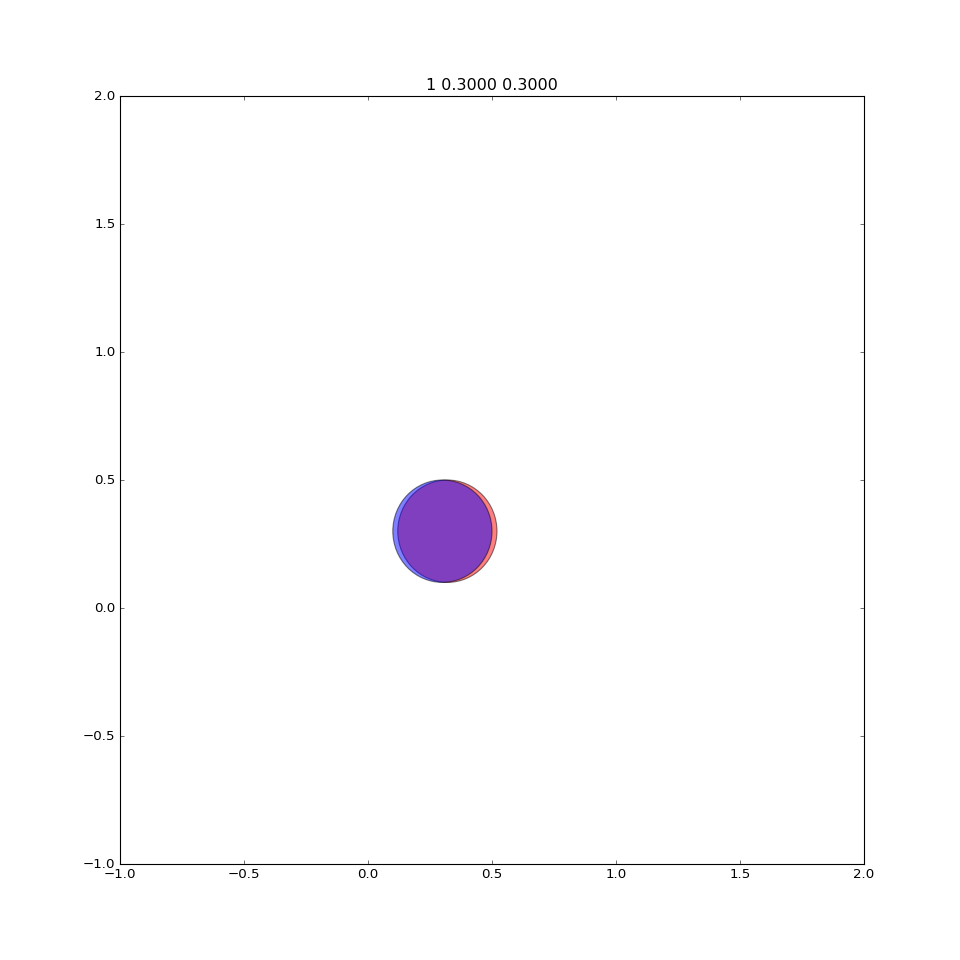

In [8]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
%matplotlib notebook

class ClickablePoint:
    def __init__(self, p,index):
        self.point = p
        self.press = None
        self.index = index

    def connect(self):
        self.cidpress = self.point.figure.canvas.mpl_connect('button_press_event', self.button_press_event)
        self.cidrelease = self.point.figure.canvas.mpl_connect('button_release_event', self.button_release_event)

    def disconnect(self):
        self.point.figure.canvas.mpl_disconnect(self.cidpress)
        self.point.figure.canvas.mpl_disconnect(self.cidrelease)

    def button_press_event(self,event):
        if event.inaxes != self.point.axes:
            return
        contains = self.point.contains(event)[0]
        if not contains: return
        self.press = self.point.center, event.xdata, event.ydata
        if self.press is None: return
        if event.inaxes != self.point.axes: return
        self.point.center, xpress, ypress = self.press
        plt.title('%d %5.4f %5.4f'%(self.index,self.point.center[0], self.point.center[1]))

    def button_release_event(self,event):
        self.press = None
        self.point.figure.canvas.draw()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.set_xlim(-1,2)
ax.set_ylim(-1,2)
circles = []
circle1 = patches.Circle((0.32,0.3), 0.2, fc='r',alpha=0.5, picker=True)
circle = patches.Circle((0.3,0.3), 0.2, fc='b', alpha=0.5, picker=True)
circles.append(ax.add_patch(circle1))
circles.append(ax.add_patch(circle))
drs = []
for i,c in enumerate(circles):
    #print c.center[0]    
    dr = ClickablePoint(c,i)
    dr.connect()   
    drs.append(dr) 
plt.show()